In [1]:
%matplotlib inline

import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook
from p_tqdm import p_map
import os
from IPython.display import clear_output
from natsort import natsorted
import numpy as np
from multiprocessing import Pool
import collections
from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import curve_fit

In [2]:
# for j in tqdm_notebook(range(5)):
#     refs = []
#     counter = 0
#     for f in tqdm_notebook(natsorted(os.listdir('time_graphs/' + str(j) + '/'))):
#         counter += 1
#         if counter%2 == 0:
#             refs.append(nx.read_graphml('time_graphs/' + str(j) + '/' + f))
        
        
# ref = nx.read_graphml('time_graphs/0/4990.graphml')
ref = nx.read_gml('power.gml', label='id')
str_dict = {}
for node in ref.nodes:
    str_dict[node] = str(node)
    
ref = nx.relabel_nodes(ref, str_dict)

In [ ]:
x = Symbol('x')
avgs = []

# ref = nx.read_graphml('time_graphs/0/4990.graphml')
ref = nx.erdos_renyi_graph(3500, 0.5)
# ref = nx.connected_watts_strogatz_graph(5000, 25, 0.15)
# ref = nx.read_gml('power.gml', label='id')

for _ in tqdm_notebook(range(1)):
    for l in tqdm_notebook(np.arange(1, 6)):
        tot = 0
        for node in tqdm_notebook(ref.nodes):
            tot += nx.ego_graph(ref, node, l - 1).number_of_nodes()
        print(tot)  
        avgs.append(tot)
                
#         counter = 0
#         boxes = [-1 for _ in range(ref.number_of_nodes())]
#         while -1 in boxes:
#             counter += 1
#             seed = str(np.random.choice([i for i in range(len(boxes)) if boxes[i] < 0]))
#             box = nx.ego_graph(ref, seed, l - 1)
#             for node in box:
#                 node = int(node)
#                 if boxes[node] < 0:
#                     boxes[node] = counter

#         vals = list(collections.Counter(boxes).values())

#         avg = sum(vals) / len(vals)
#         print(avg, len(vals))
#         df = solve(l**(-x) - avg)
# #         print(df, l, avg)
#         avgs.append(len(vals))
        
avgs

3500


[3569 1004  205   69   30]


C:\Users\jxbox\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ 26.62912404 975.2       ]


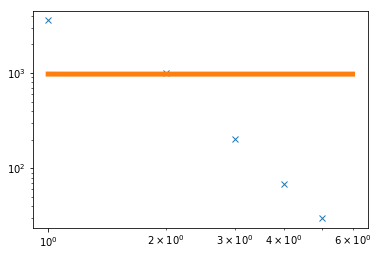

In [41]:
# fig = plt.figure()
# ax = plt.gca()
# ax.set_yscale('log')
# ax.scatter([1, 2, 3, 4, 5], [x / ref.number_of_nodes() for x in avgs])
# # ax.set_yscale('log')

def hausdorff(lb, db, a):
    return a + lb**-db

x = np.arange(1, 6)
y = np.array(avgs)
# y = np.array([x / ref.number_of_nodes() for x in avgs])
# y = np.array([ref.number_of_nodes() / x for x in avgs])
print(y)

popt = curve_fit(hausdorff, x, y)[0]
print(popt)

plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, 'x')
xx = np.linspace(1, 6, 100)
yy = [hausdorff(x, popt[0], popt[1]) for x in xx]
plt.plot(xx, yy, lw=5)

In [57]:
sums = [0 for _ in range(4)]
lens = [0 for _ in range(4)]

for i in range(25):
    for j in range(4):
        sums[j] += avgs[0]
        lens[j] += 1
        avgs = avgs[1:]
        
[sums[i] / lens[i] for i in range(4)]

[17.650310854738766, 52.26882312180371, 108.75747467622732, 220.50130414728173]

In [63]:
def deg_plot(G):

    degree_sequence = [d for (n, d) in G.degree()]
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    tot = sum(cnt)
    per = [c / tot for c in cnt]

    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(deg, per)
    plt.show()

length:  2


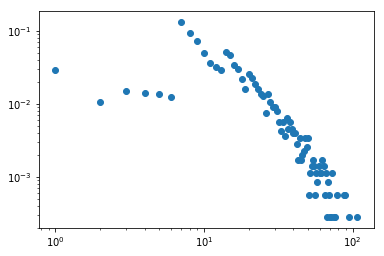

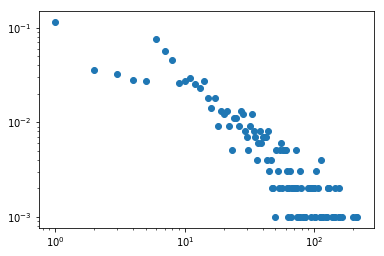

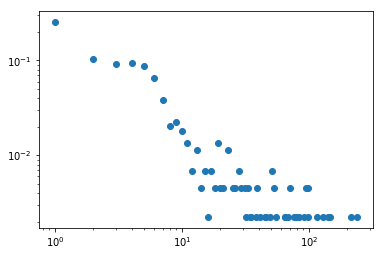

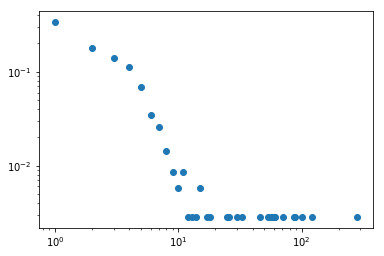

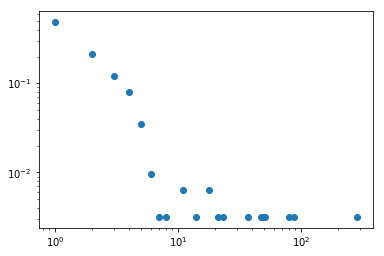

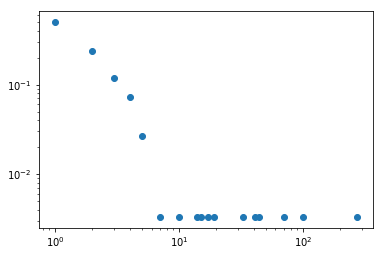

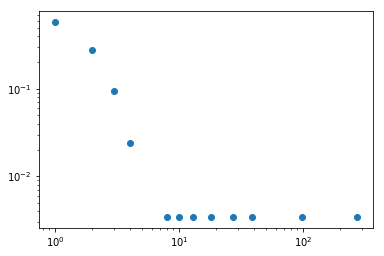

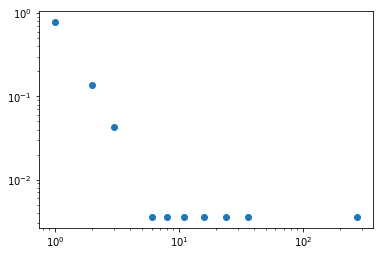

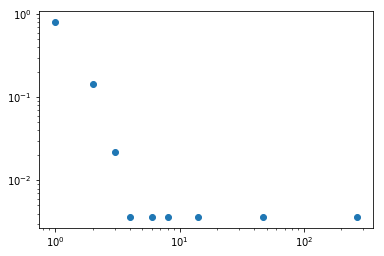

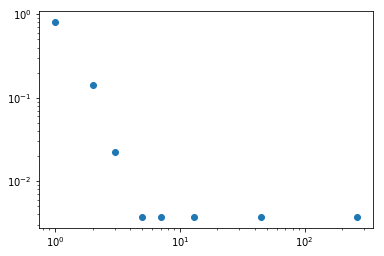

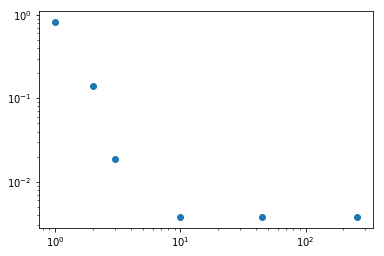

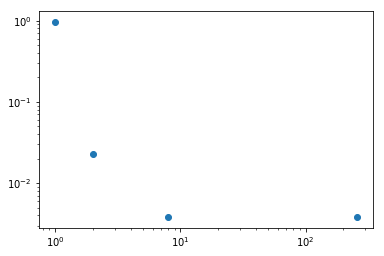

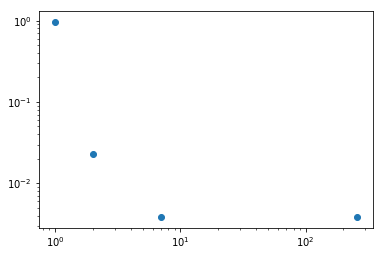

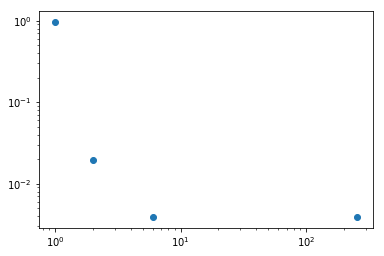

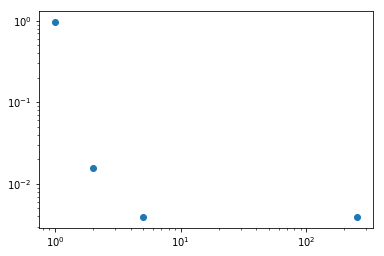

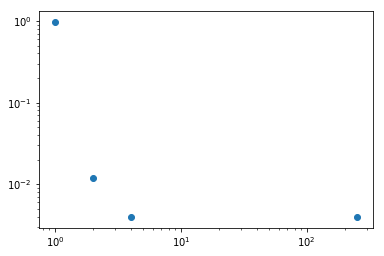

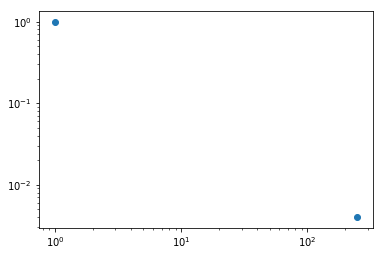

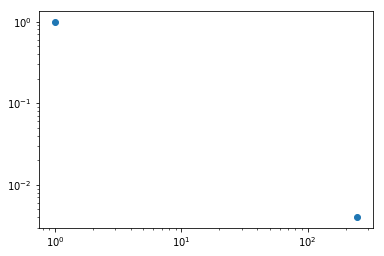

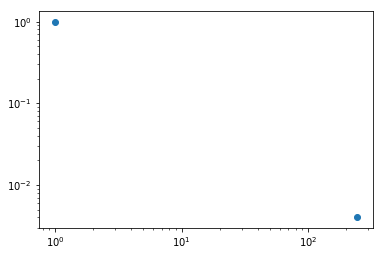

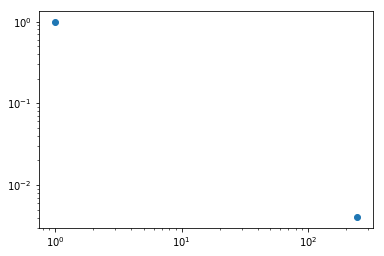

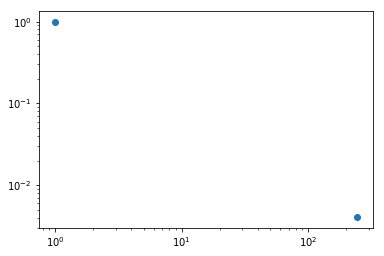

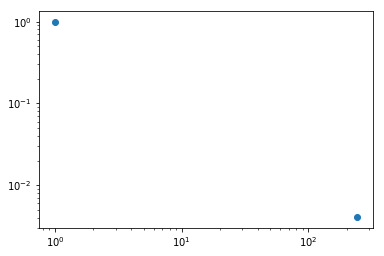

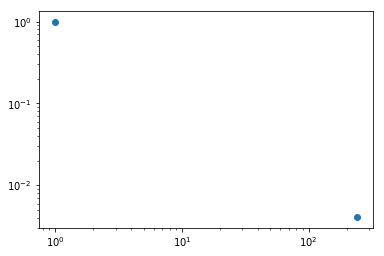

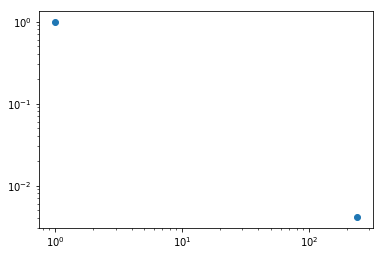

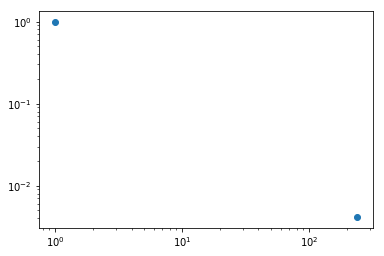

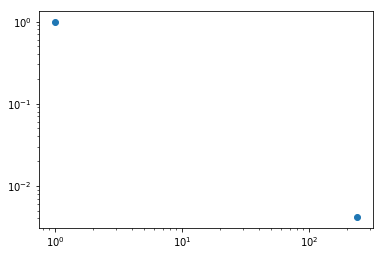

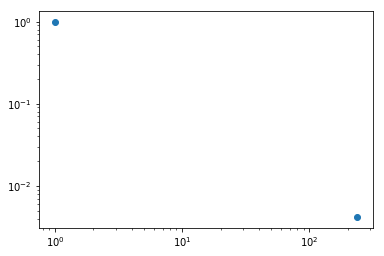

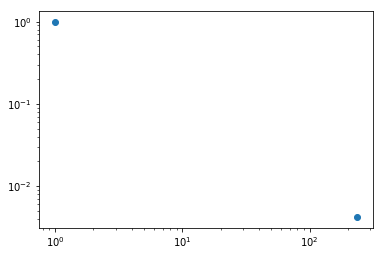

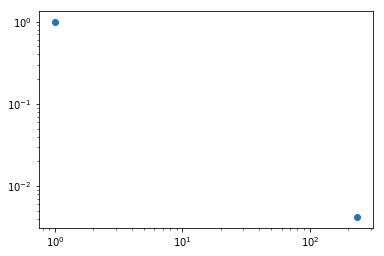

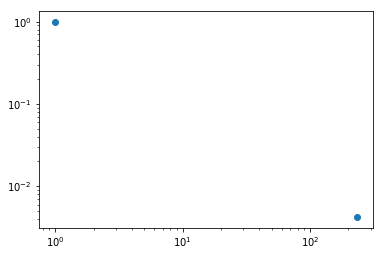

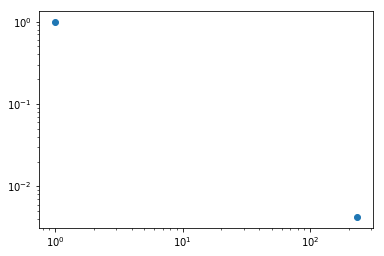

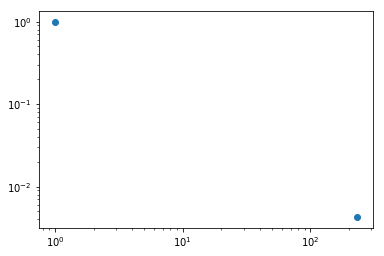

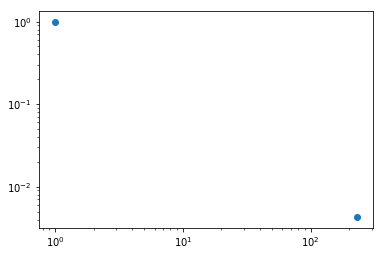

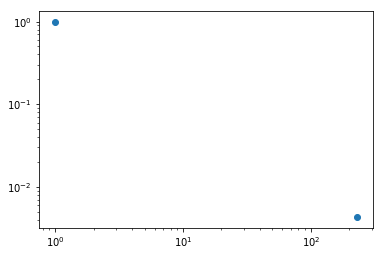

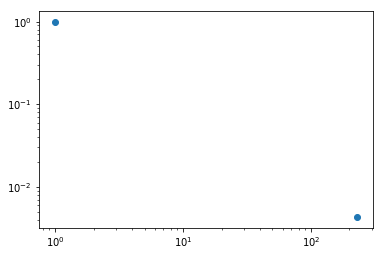

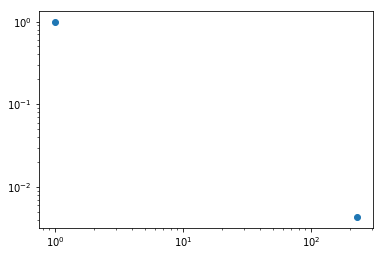

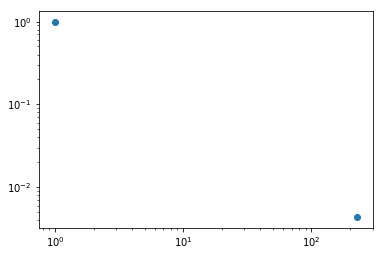

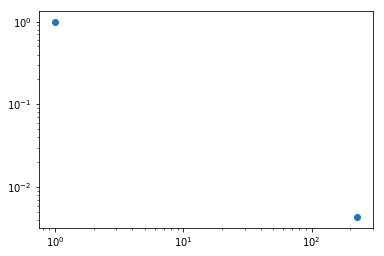

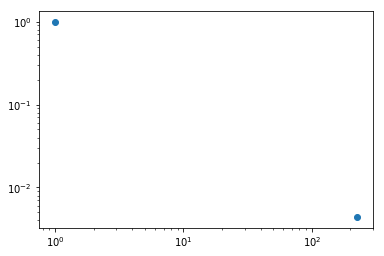

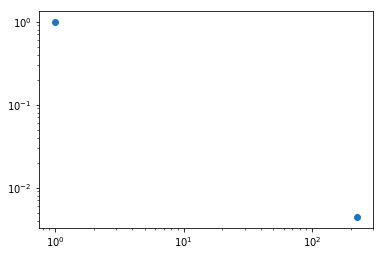

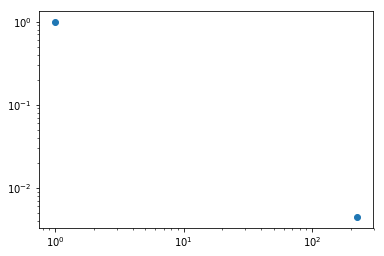

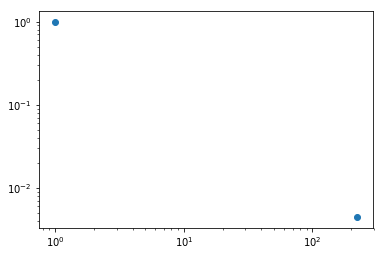

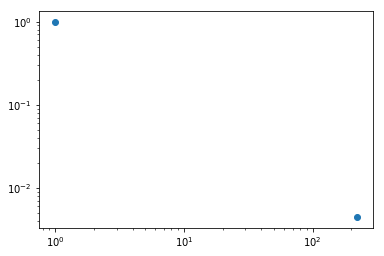

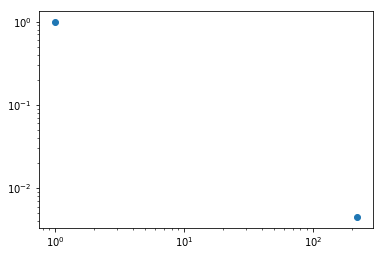

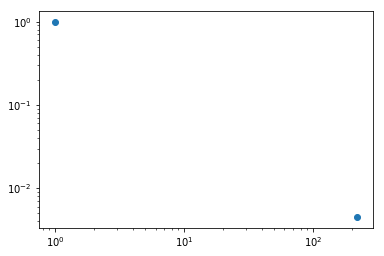

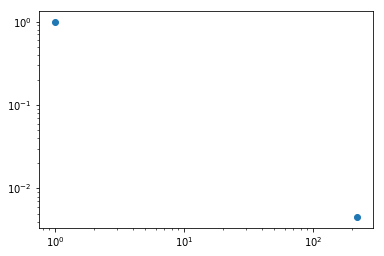

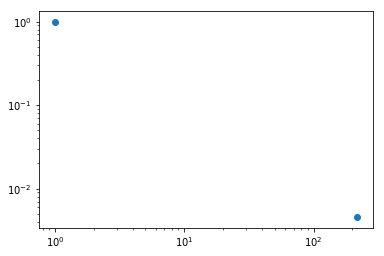

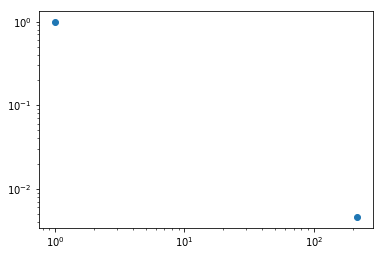

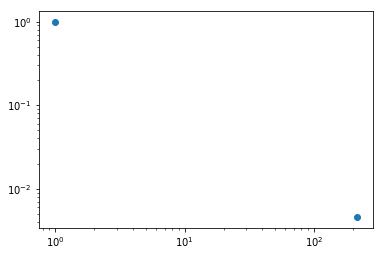

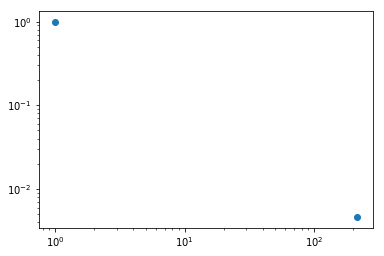

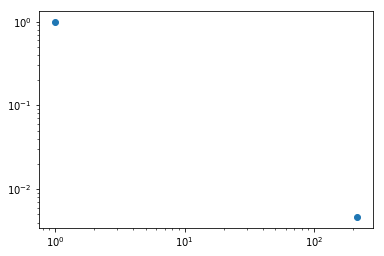

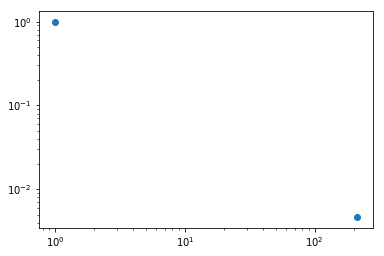

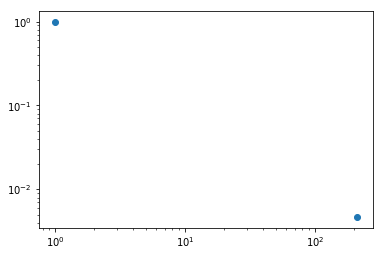

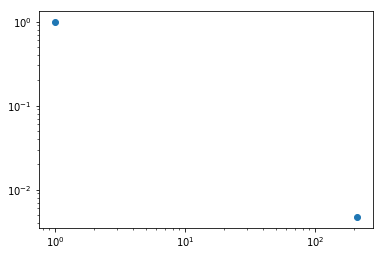

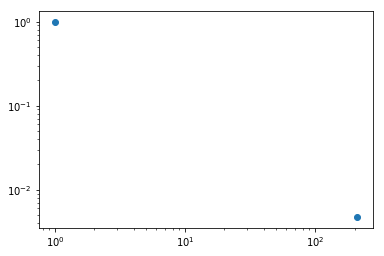

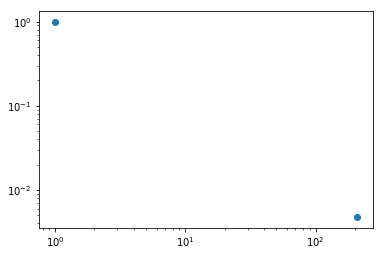

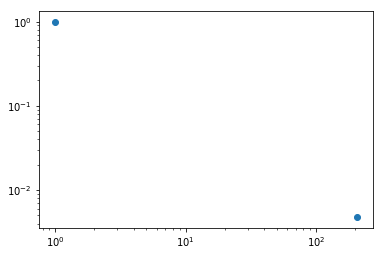

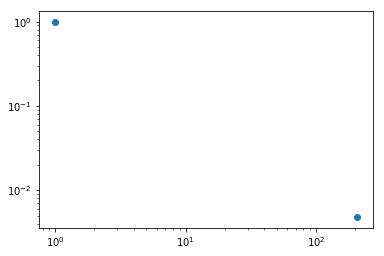

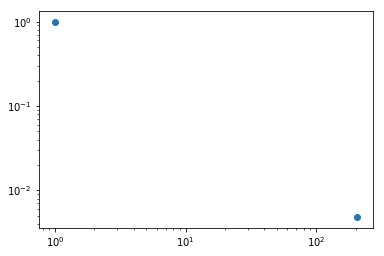

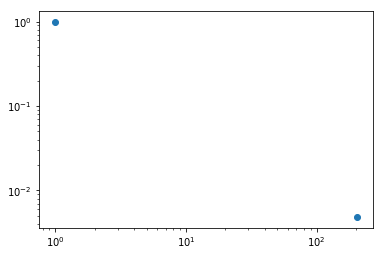

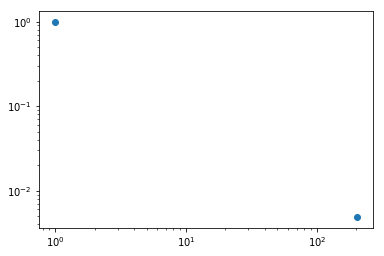

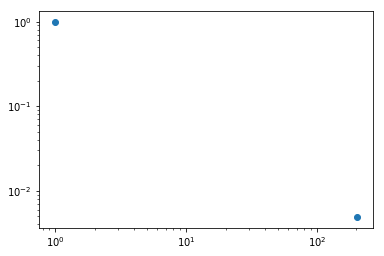

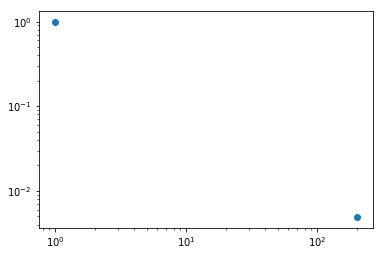

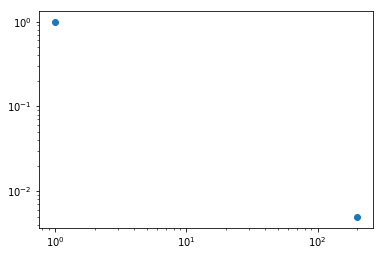

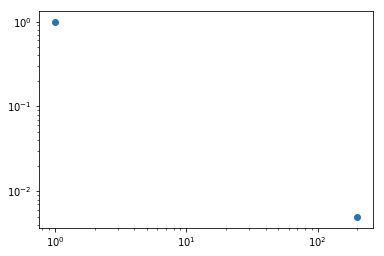

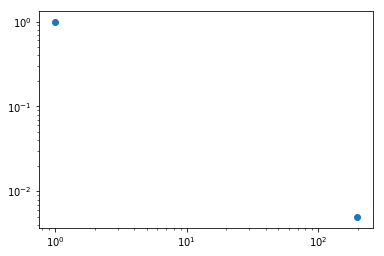

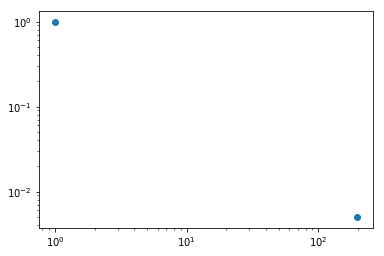

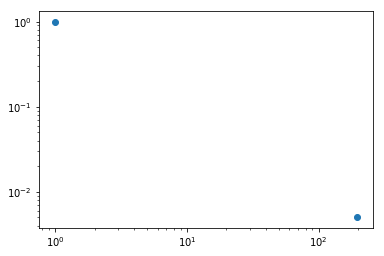

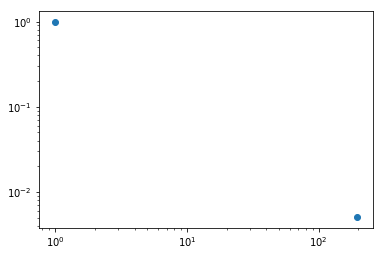

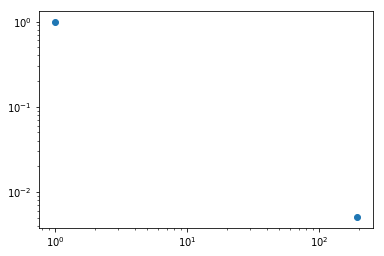

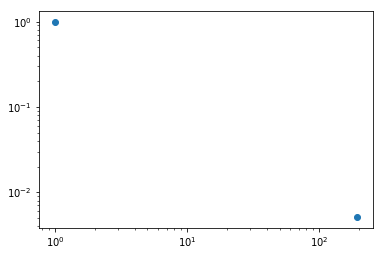

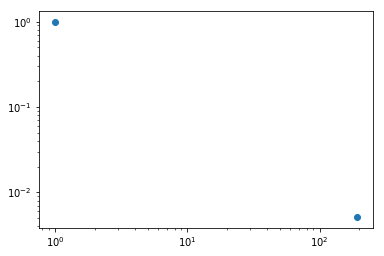

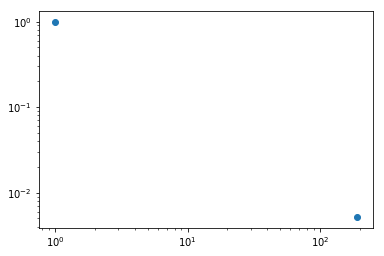

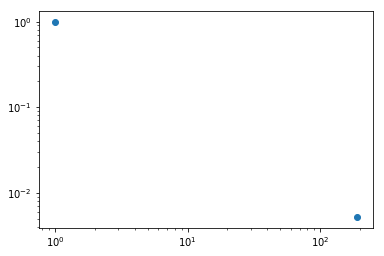

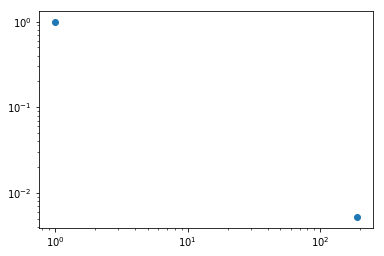

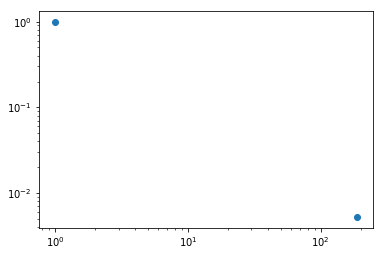

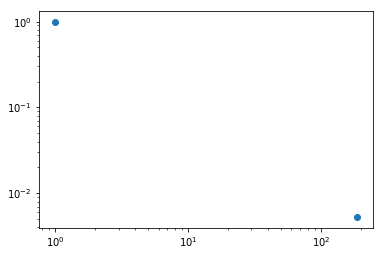

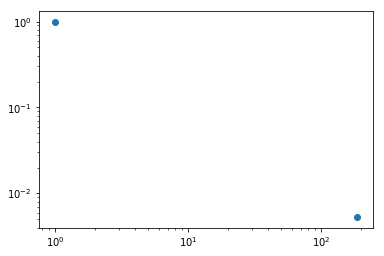

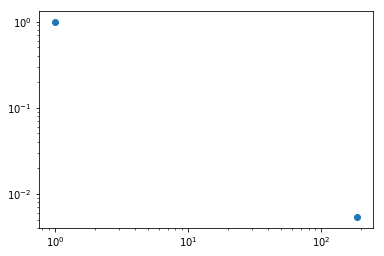

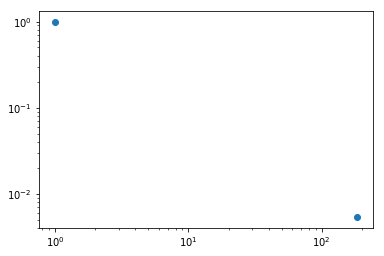

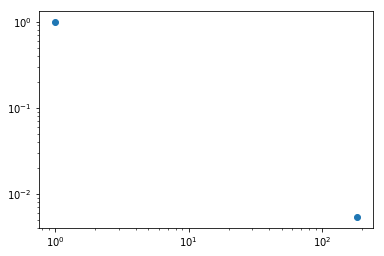

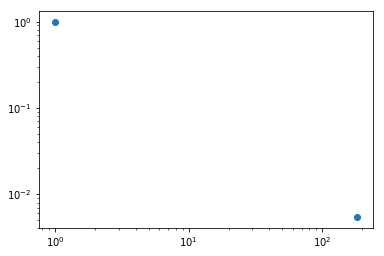

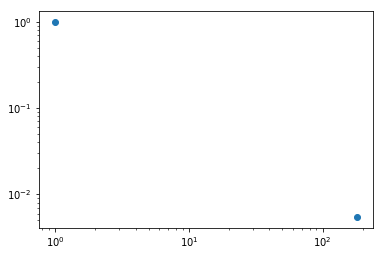

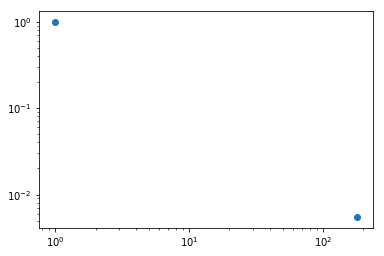

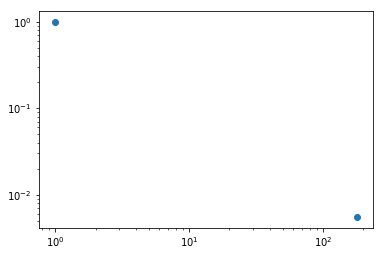

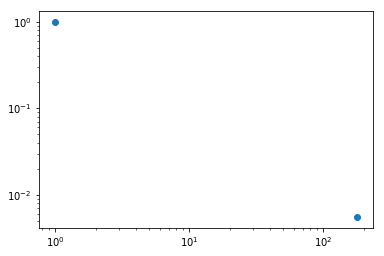

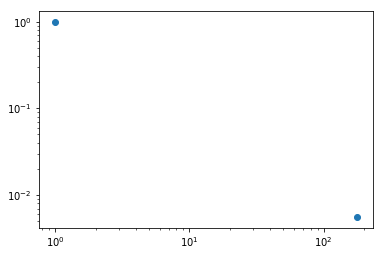

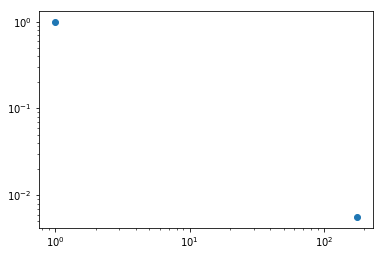

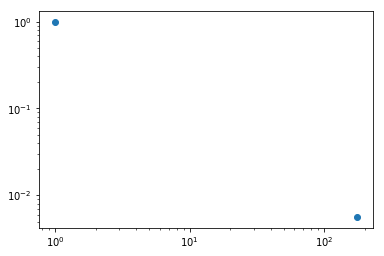

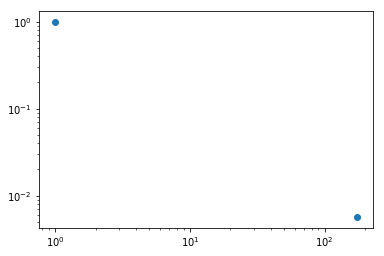

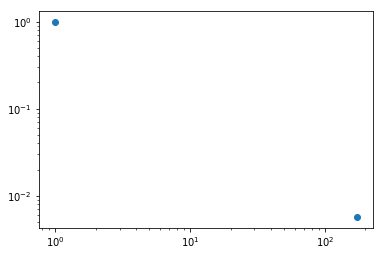

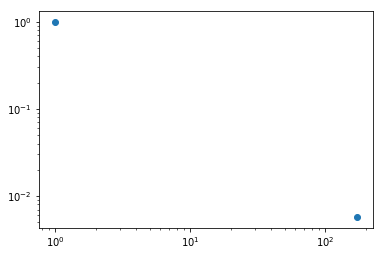

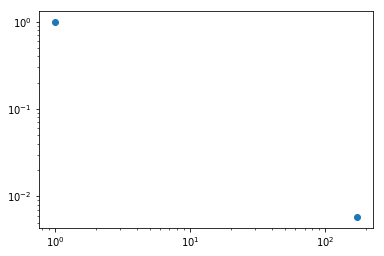

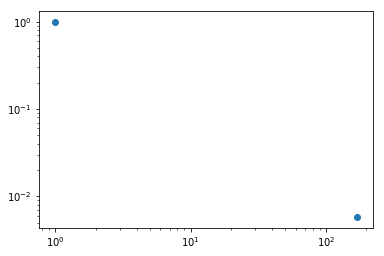

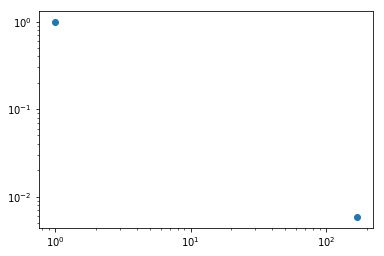

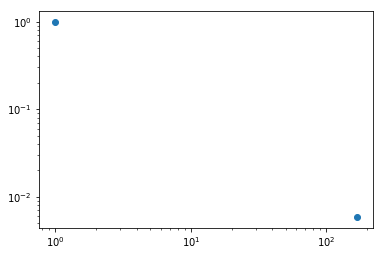

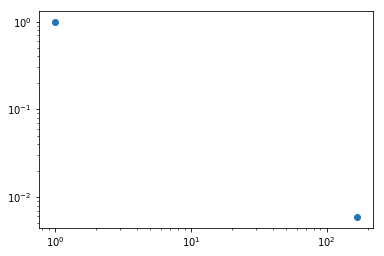

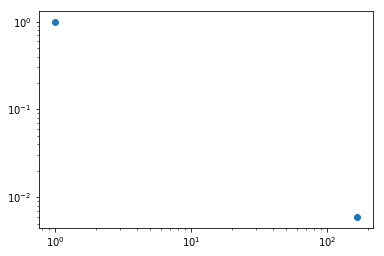

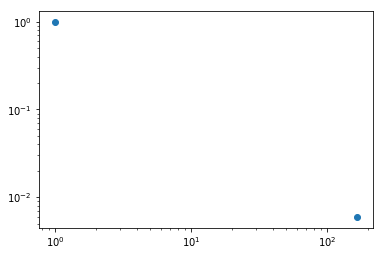

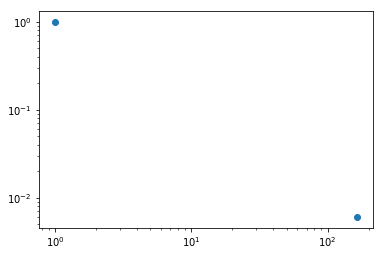

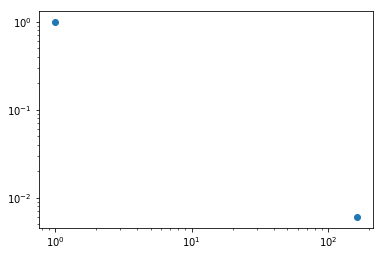

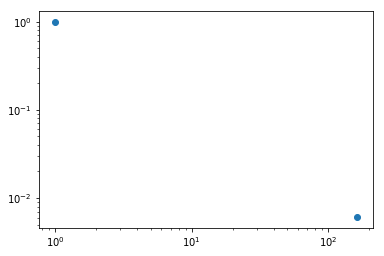

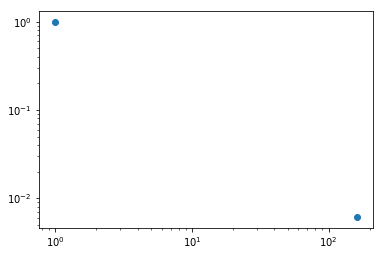

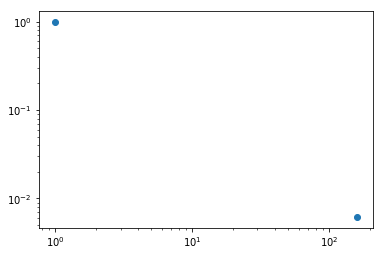

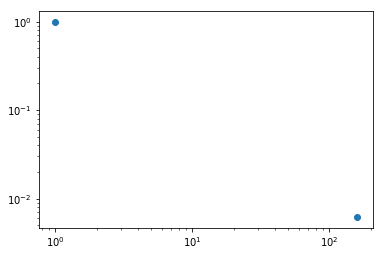

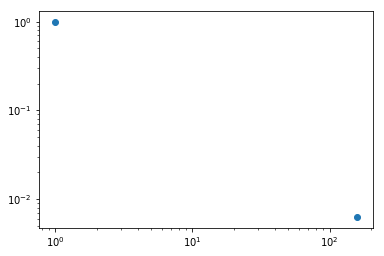

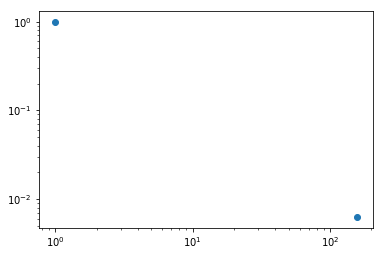

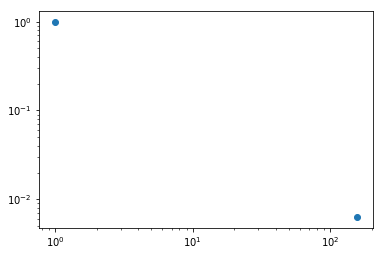

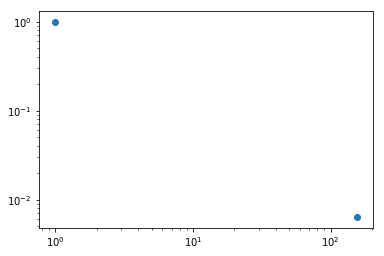

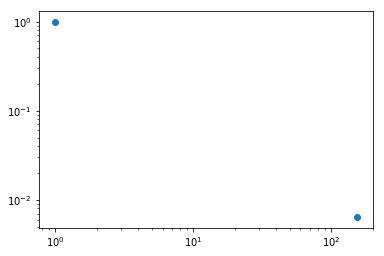

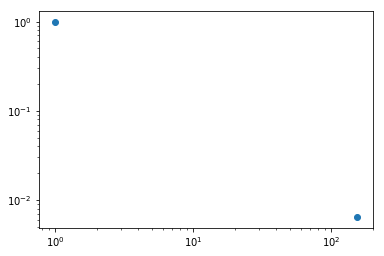

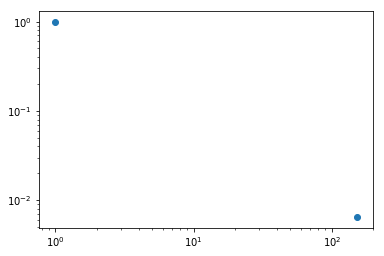

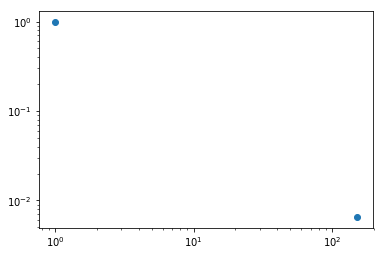

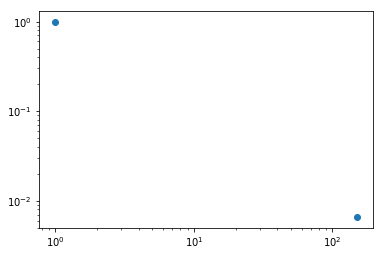

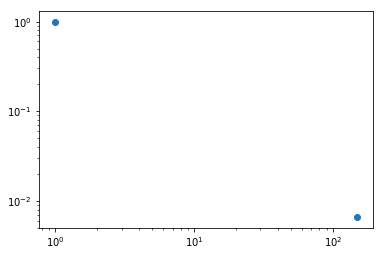

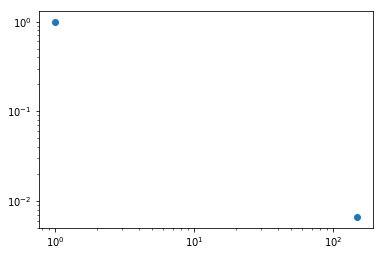

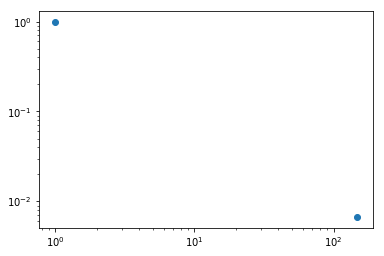

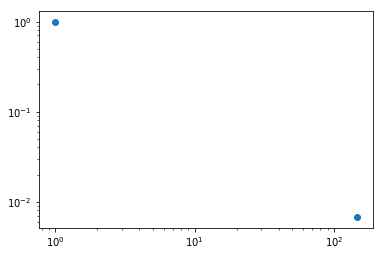

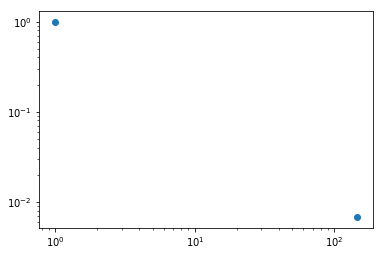

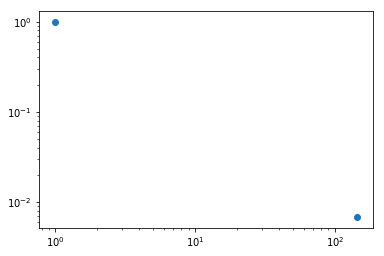

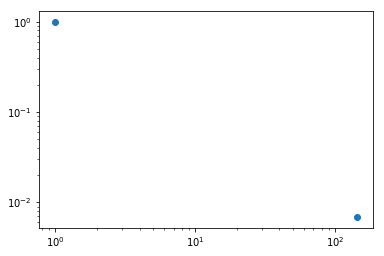

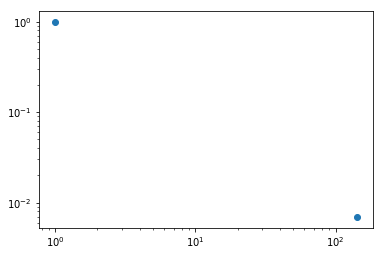

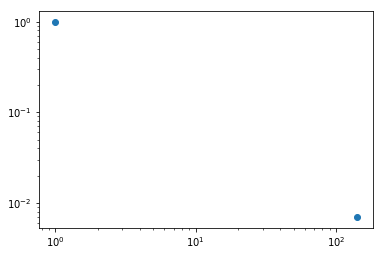

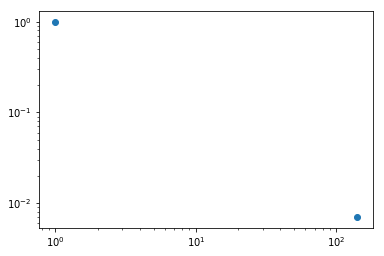

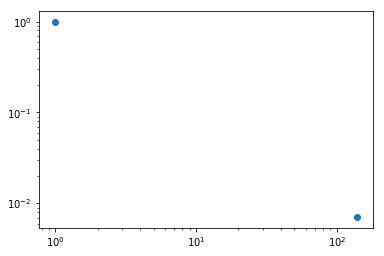

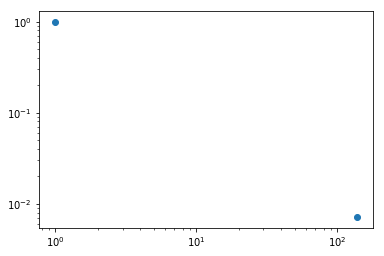

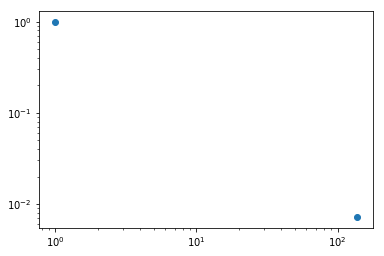

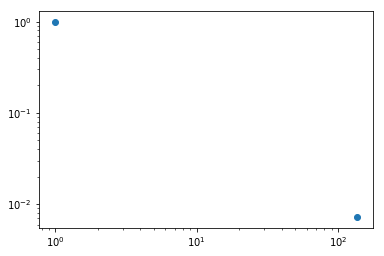

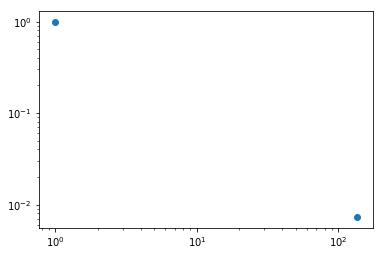

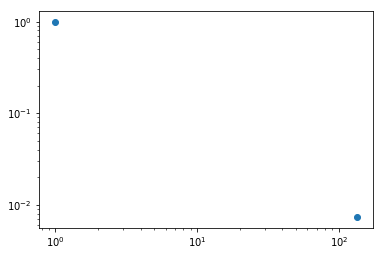

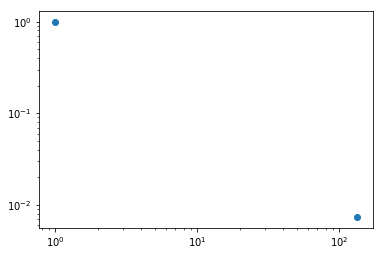

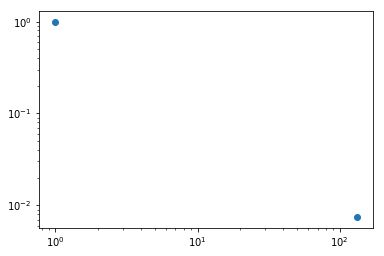

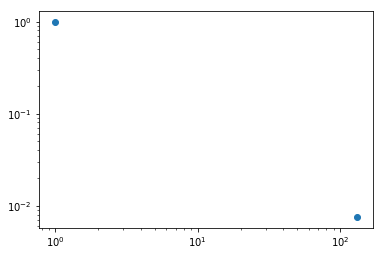

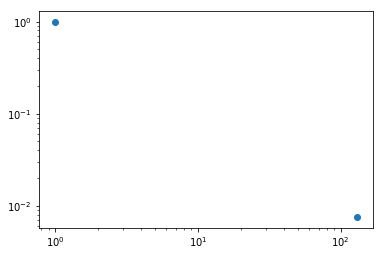

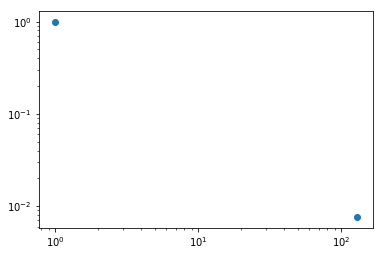

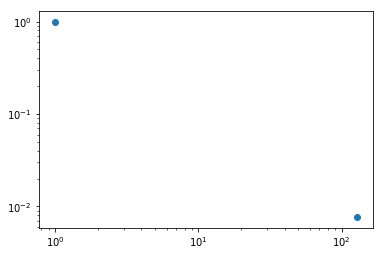

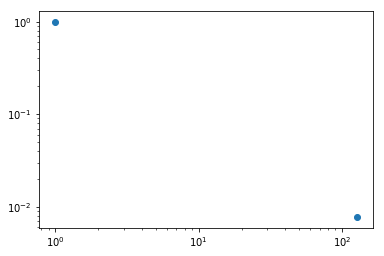

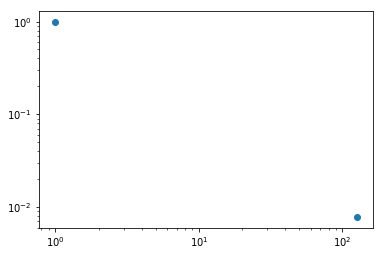

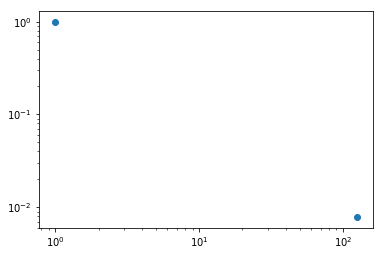

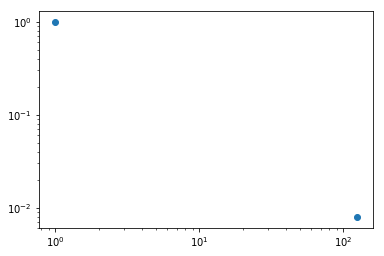

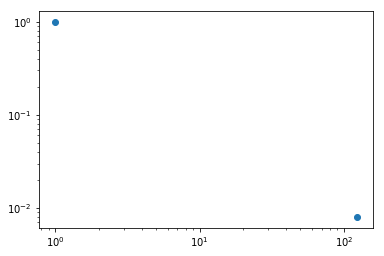

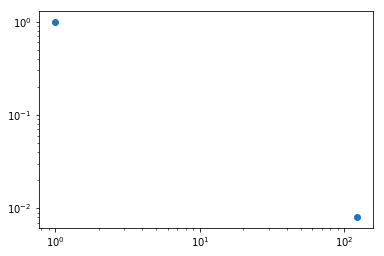

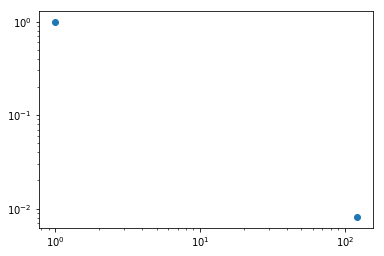

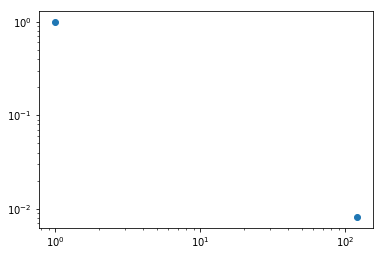

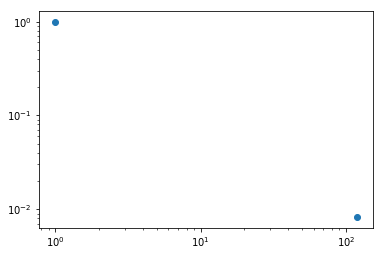

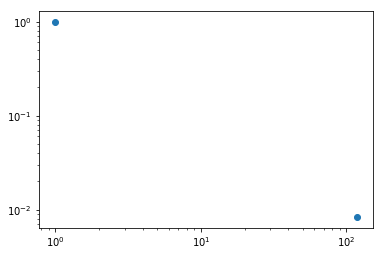

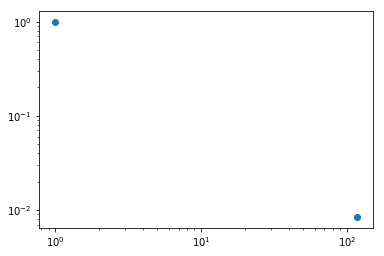

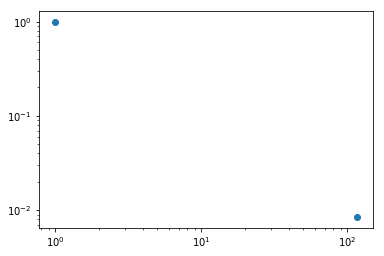

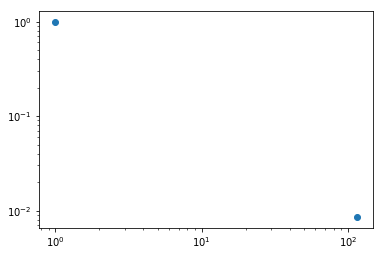

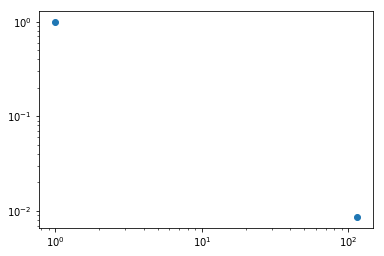

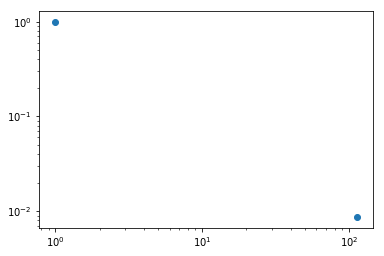

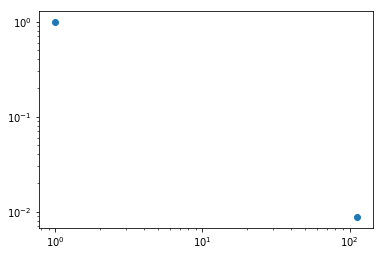

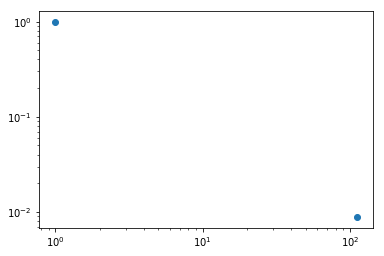

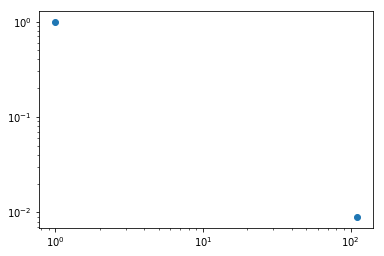

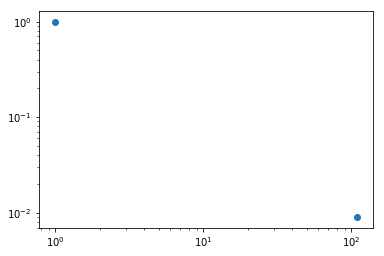

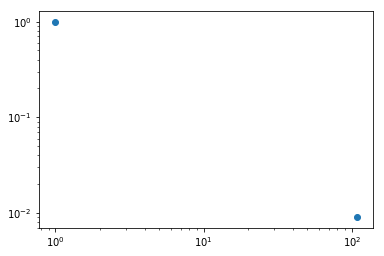

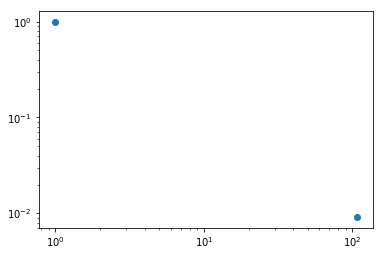

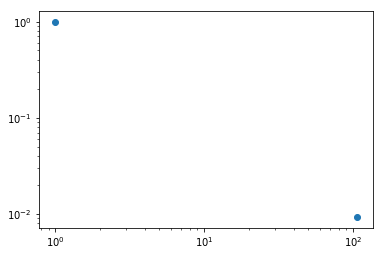

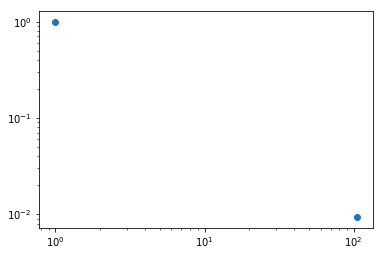

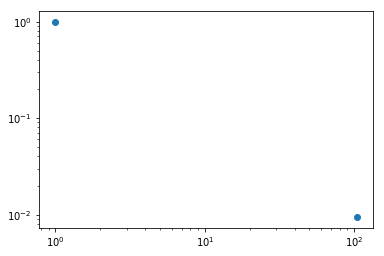

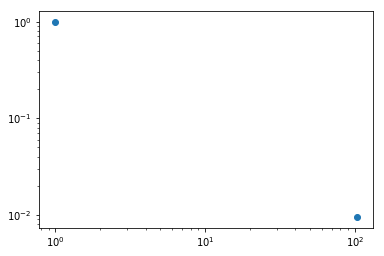

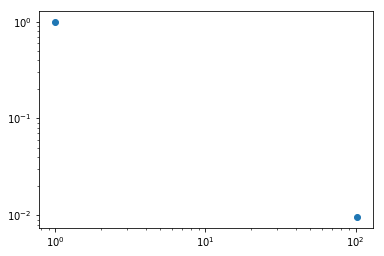

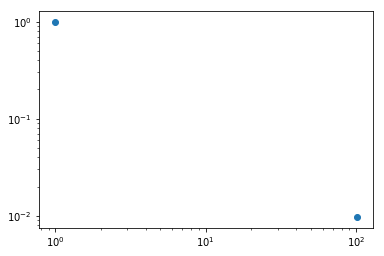

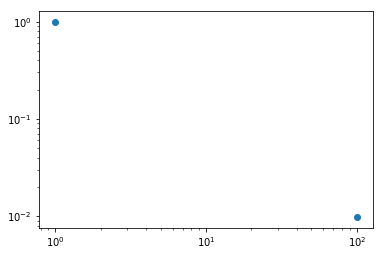

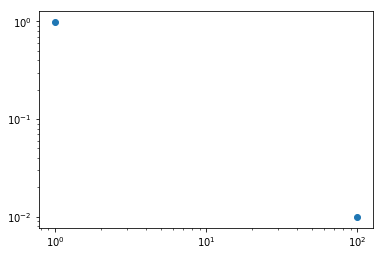

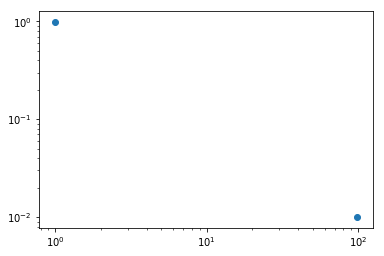

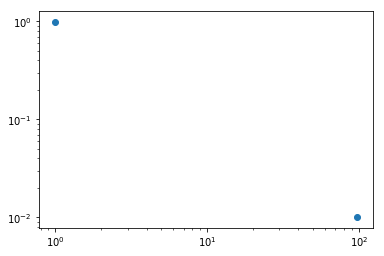

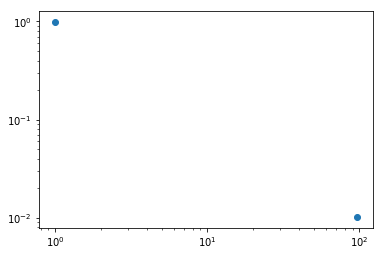

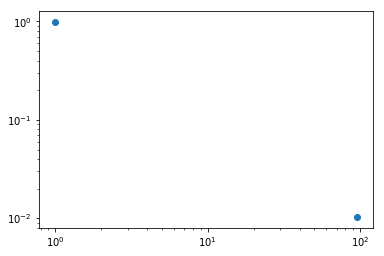

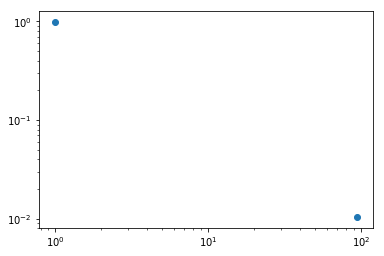

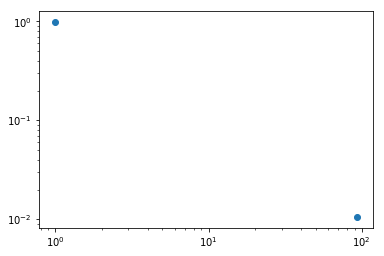

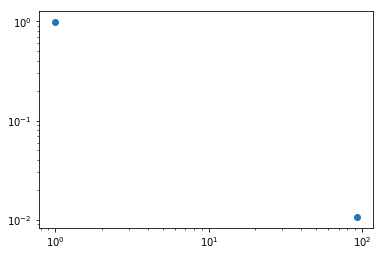

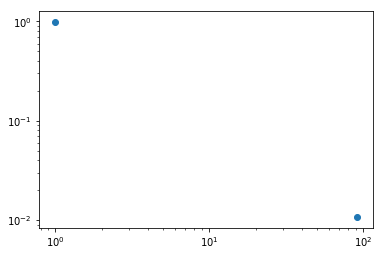

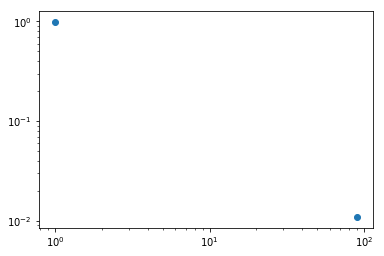

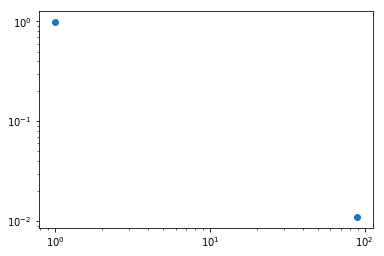

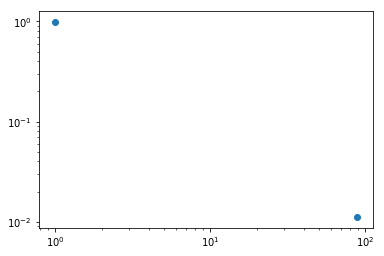

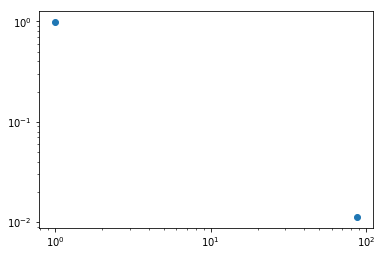

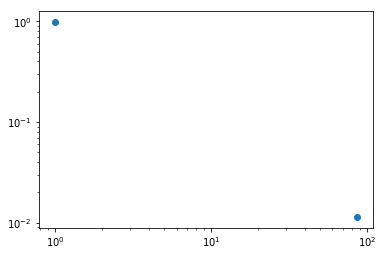

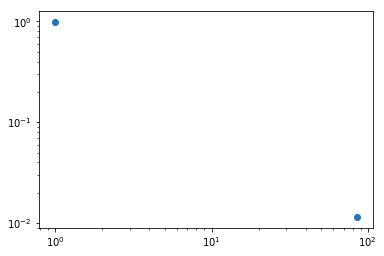

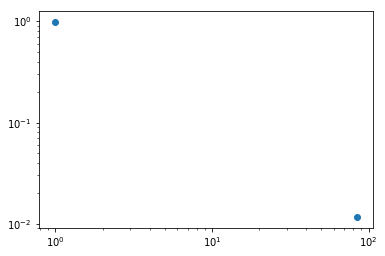

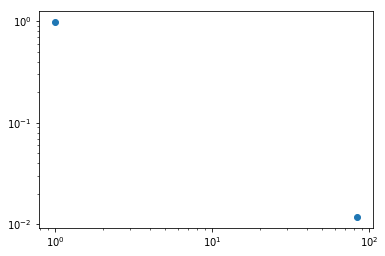

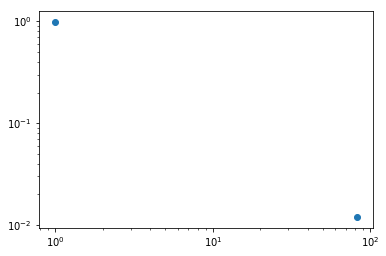

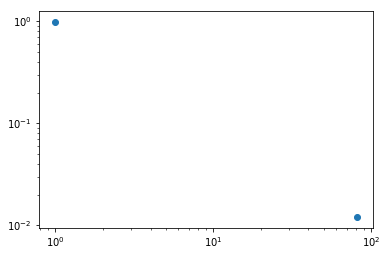

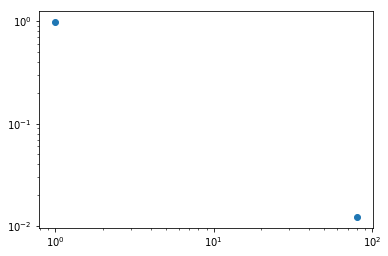

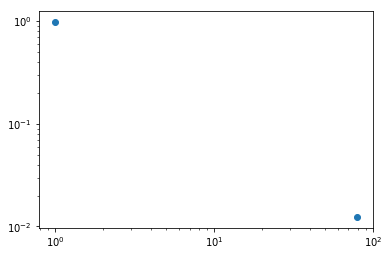

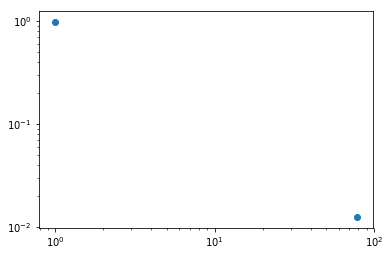

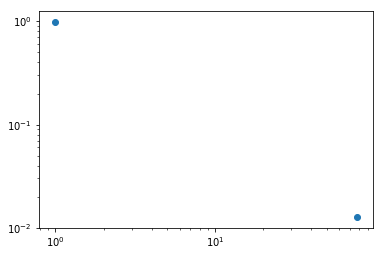

length:  3


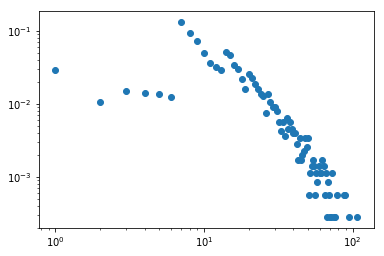

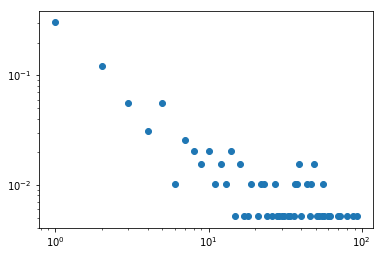

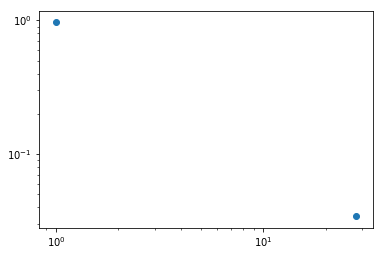

length:  4


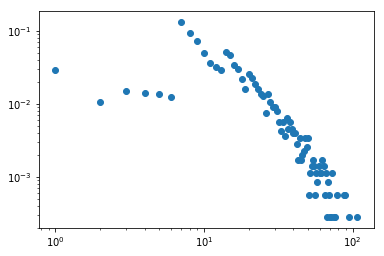

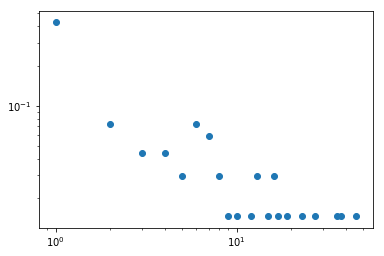

length:  5


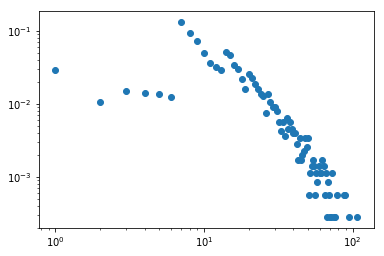

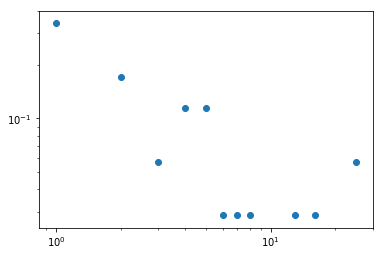

In [87]:
# (i) Choose a random uncovered node as the seed for a new box.
# (ii) All uncovered nodes connected to the current box are tested for being within
# distance ℓB from all the nodes currently in the box. Nodes that obey this criterion
# are included in the box.
# (iii) Repeat (ii) until there are no more nodes that can be added in this box.
# (iv) Repeat (i)-(iii) until all nodes are covered

avgs = []
all_edges = []
for l in tqdm_notebook([2,3,4,5]):
    print("length: ", l)
    ref = nx.read_graphml('time_graphs/0/4990.graphml')
    coarse = 0
    while (ref.number_of_nodes() > 1) or coarse > 5:
        course += 1
        deg_plot(ref)
        counter = -1
        boxes = [-1 for _ in range(ref.number_of_nodes())]
        while -1 in boxes:
            counter += 1
            seed = str(np.random.choice([i for i in range(len(boxes)) if boxes[i] < 0]))
            box = nx.ego_graph(ref, seed, l - 1)
            for node in box:
                node = int(node)
                if boxes[node] < 0:
                    boxes[node] = counter

        vals = list(collections.Counter(boxes).values())
        edges = []
        for u, v in ref.edges:
            u = str(boxes[int(u)])
            v = str(boxes[int(v)])
            if u != v:
                edges.append((u, v))

        ref = nx.Graph()
        ref.add_edges_from(edges)